Here we will consider each of the systems as separate from each other.

- Introduction of qualitative predictors
- Interaction / No-Interaction
- Best Subset-selection

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
data2 = pd.ExcelFile('ModifiedData/Cu_sys_intro.xlsx')
print(data2.sheet_names)
df3 = data2.parse('Sheet1')
df3.head(5)

df4 = df3.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df4.dropna()
pd.options.display.max_rows = 999
df4.info()
df4.head(5)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
X              72 non-null int64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


,Dinv,LnFeDomains,LnDinv,X
0,2.325581,-0.063935,0.843970,1
1,3.125000,-0.171537,1.139434,1
2,3.030303,-0.297457,1.108663,1
3,3.030303,-0.565593,1.108663,1
4,4.166667,-0.818951,1.427116,1


In [3]:
FNS = df4[(df4['X']==1)]
FNP = df4[(df4['X']==2)]
FNC = df4[(df4['X']==3)]
FNSi = df4[(df4['X']==4)]
FNSP = df4[(df4['X']==5)]
FSC = df4[(df4['X']==6)]

Separating all the systems >> Now we can see that FeNiC, and FeNiP show different trend from the FiNiS systems

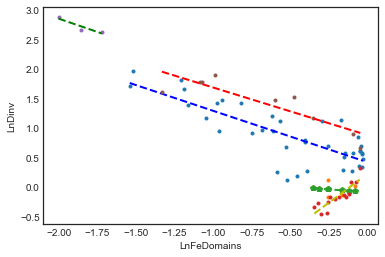

In [4]:
# SULPHUR
fit = np.polyfit(FNS['LnFeDomains'],FNS['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNS['LnFeDomains'],FNS['LnDinv'], '.', np.sort(FNS['LnFeDomains']), fit_fn(np.sort(FNS['LnFeDomains'])), '--b', linewidth=2)

# PHOSPHORUS
fit = np.polyfit(FNP['LnFeDomains'],FNP['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNP['LnFeDomains'],FNP['LnDinv'], '.', np.sort(FNP['LnFeDomains']), fit_fn(np.sort(FNP['LnFeDomains'])), '--p', linewidth=2)

# CARBON
fit = np.polyfit(FNC['LnFeDomains'],FNC['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNC['LnFeDomains'],FNC['LnDinv'], '.', np.sort(FNC['LnFeDomains']), fit_fn(np.sort(FNC['LnFeDomains'])), '--y', linewidth=2)

# S&P
fit = np.polyfit(FNSP['LnFeDomains'],FNSP['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNSP['LnFeDomains'],FNSP['LnDinv'], '.', np.sort(FNSP['LnFeDomains']), fit_fn(np.sort(FNSP['LnFeDomains'])), '--g', linewidth=2)

# Fe-S-C
fit = np.polyfit(FSC['LnFeDomains'],FSC['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FSC['LnFeDomains'],FSC['LnDinv'], '.', np.sort(FSC['LnFeDomains']), fit_fn(np.sort(FSC['LnFeDomains'])), '--r', linewidth=2)


plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

Clearly we can see that, different systems have different values of fractionation constant for same value of FeDomains.

#### MULTIPLE LINEAR REGRESSION

In [5]:
df4.tail(5)

,Dinv,LnFeDomains,LnDinv,X
67,4.545455,-0.480008,1.514128,6
68,2.439024,-0.092811,0.891598,6
69,1.923077,-0.047822,0.653926,6
70,5.000000,-1.332359,1.609438,6
71,5.882353,-1.083738,1.771957,6


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


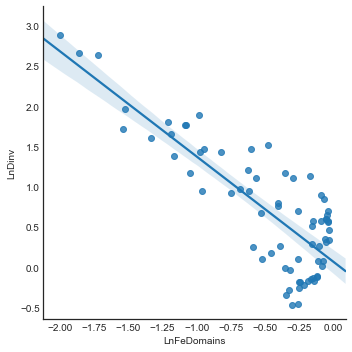

In [6]:
sns.lmplot(x='LnFeDomains', y='LnDinv', data=df4)
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


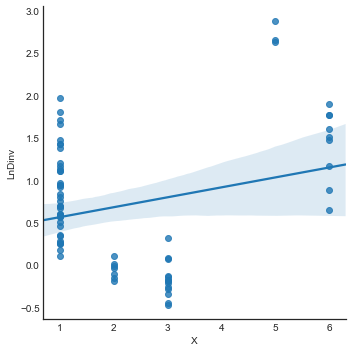

In [7]:
sns.lmplot(x='X', y='LnDinv', data=df4)
plt.show()

In [8]:
# # This plot shows the major problem with these models,
# # we can see that the various systems do not have data point distributed equally
# # but we see concentrations of systems in some small potion of FeDomain values.

In [9]:
est = smf.ols('LnDinv ~ LnFeDomains + X*LnFeDomains', df4).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LnDinv   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     50.18
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.21e-17
Time:                        03:25:50   Log-Likelihood:                -41.983
No. Observations:                  72   AIC:                             91.97
Df Residuals:                      68   BIC:                             101.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1670      0.135      1.234      0.221      -0.103       0.437
LnFeDomains      -0.9963      0.201     -4.949      0.000      -1.398      -0.595
X                -0.0311      0.050     -0.622      0.536      -0.131       0.069
X:LnFeDomains    -0.0954      0.057     -1.671      0.099      -0.209       0.019
==============================================================================
Omnibus:                        4.589   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.520
Skew:                          -0.212   Prob(JB):                        0.284
Kurtosis:                       2.188   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we treated X as a quantitative variable, which it is not.<br>
What does this high p-value means ?<BR>
Next we will treat X as qualitative variable<br>

### Multiple regression

In [10]:
data3 = pd.ExcelFile('ModifiedData/Cu_sys_oh.xlsx')
print(data3.sheet_names)
df5 = data3.parse('Sheet1')
df5.head(5)

df6 = df5.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df6.dropna()
pd.options.display.max_rows = 999
df6.info()
df6.head(5)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
x1             72 non-null int64
x2             72 non-null int64
x3             72 non-null int64
x4             72 non-null int64
x5             72 non-null int64
x6             72 non-null int64
dtypes: float64(3), int64(6)
memory usage: 5.1 KB


,Dinv,LnFeDomains,LnDinv,x1,x2,x3,x4,x5,x6
0,2.325581,-0.063935,0.843970,1,0,0,0,0,0
1,3.125000,-0.171537,1.139434,1,0,0,0,0,0
2,3.030303,-0.297457,1.108663,1,0,0,0,0,0
3,3.030303,-0.565593,1.108663,1,0,0,0,0,0
4,4.166667,-0.818951,1.427116,1,0,0,0,0,0


Here we are considering interaction terms

In [11]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1*LnFeDomains + x2*LnFeDomains + x3*LnFeDomains + x5*LnFeDomains + x6*LnFeDomains ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     71.00
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.95e-29
Time:                        03:25:50   Log-Likelihood:                 3.3054
No. Observations:                  72   AIC:                             13.39
Df Residuals:                      62   BIC:                             36.16
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4111      0.394      1.

**p-values** are quite high!, check what does it mean.

Tried to plot the above regression

In [12]:
# feDomains = np.linspace(0,100)

# sulphur = np.linspace(regr1['Intercept']+regr1['x1'],regr1['Intercept']+regr1['x1']+100*regr1['LnFeDomains'])
# phosphorus = np.linspace(regr1['Intercept']+regr1['x2'],regr1['Intercept']+regr1['x2']+100*regr1['LnFeDomains'])
# carbon = np.linspace(regr1['Intercept']+regr1['x3'],regr1['Intercept']+regr1['x3']+100*regr1['LnFeDomains'])
# SC = np.linspace(regr1['Intercept']+regr1['x5'],regr1['Intercept']+regr1['x5']+100*regr1['LnFeDomains'])
# SP = np.linspace(regr1['Intercept']+regr1['x6'],regr1['Intercept']+regr1['x6']+100*regr1['LnFeDomains'])

# plt.plot(feDomains, sulphur)
# plt.plot(feDomains, SP)
# plt.plot(feDomains, SC)
# plt.show()

# # # Create plot
# # fig, (ax1,ax2,ax3,ax5,ax6) = plt.subplots(5,1, figsize=(12,12))
# # ax1.plot(feDomains, sulphur, 'b')
# # ax2.plot(feDomains, phosphorus, 'p')
# # ax3.plot(feDomains, carbon, 'y')
# # ax5.plot(feDomains, SC, 'g')
# # ax6.plot(feDomains, SP, 'r')

# # for ax in fig.axes:
# #     ax.legend(['System'], loc=2)
# #     ax.set_xlabel('LnFeDomains')
# #     ax.set_ylabel('LnDinv')
# #     ax.set_ylim(ymax=10)

Some error in the above code

--------------------------

Here we are not considering no interaction between Fe Domains and the system in which they belong.

In [13]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1+ x2 + x3 + x5 + x6 ', df6).fit()
regr1 = est1.params
print(est1.summary())
print("AIC = ",est1.aic)
print("BIC = ",est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.59e-30
Time:                        03:25:51   Log-Likelihood:                -4.4034
No. Observations:                  72   AIC:                             20.81
Df Residuals:                      66   BIC:                             34.47
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3219      0.062      5.151      

Note: The p-value declined.

We are getting warning of multicollinearity

StackExchange:<BR>

The problem you are having (i.e., "singularities") can be thought of as an instance of multicollinearity. Multicollinearity is often defined as:
One or more predictor variables are a linear combination of other predictor variables.
This is, in fact, a rather strict definition; it is perfect multicollinearity, and you can easily have a problem with multicollinearity without any of your variables being perfect linear combinations of others. Moreover, perfect multicollinearity rarely occurs. However, you have stumbled across an case where it can occur. Let us see how we can perfectly predict medium quality from our knowledge of the other two categories (we'll do this with a regression model where medium quality is Y, and bad quality & high quality are X1 & X2, respectively):

<BR>When representing a categorical variable, we typically use reference cell coding (often called 'dummy coding'). To do this, we pick one level of our categorical variable as the reference level; that level does not get its own dummy code, but is simply indicated by having all 0's in the dummy codes for all other levels. The other levels of your categorical variable are represented by dummy codes just as you have already done. (For some more information on this, you can see my answer here: Regression based for example on days of week.) 

First, days of the week are included via a coding scheme. The most popular is 'reference category' coding (typically called dummy coding). Lets imagine that your data are represented in a matrix, with your cases in rows and your variables in columns. In this scheme, if you had 7 categorical variables (e.g., for days of the week) you would add 6 new columns. You would pick one day as the reference category, generally the one that is thought of as the default. Often this is informed by theory, context, or the research question. I have no idea which would be best for days of the week, but it also doesn't really matter much, you could just pick any old one. Once you have the reference category, you could assign the others to your new 6 variables, then you simply indicate whether that variable obtains for each case. For example, say you pick Sunday as the reference category, your new columns / variables would be Monday-Saturday. Every observation that took place on a Monday would be indicated with a 1 in the Monday column, and a 0 elsewhere. The same would happen with observations on Tuesdays and so on. Note that no case can get a 1 in 2 or more columns, and that observations that took place on Sunday (the reference category) would have 0's in all of your new variables. There are many other coding schemes possible, and the link does a good job of introducing them. You can test to see if the day of the week matters by testing the nested model with all of the new 6 variables dropped vs. the full model with all 6 included. Note that you should not use the tests that are reported with standard output, as these are not independent and have intrinsic multiple comparison problems.

We are taking Fe-Ni-S-P as the reference system so we have removed Fe-Ni-S-P, and also the Si column which is empty.

In [14]:
data4 = pd.ExcelFile('ModifiedData/Cu_sys_coll.xlsx')
print(data4.sheet_names)
df7 = data4.parse('Sheet1')
df7.head(5)

df8 = df7.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df8.dropna()
pd.options.display.max_rows = 999
df8.info()
df8.head(5)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
x1             72 non-null int64
x2             72 non-null int64
x3             72 non-null int64
x5             72 non-null int64
dtypes: float64(3), int64(4)
memory usage: 4.0 KB


,Dinv,LnFeDomains,LnDinv,x1,x2,x3,x5
0,2.325581,-0.063935,0.843970,1,0,0,0
1,3.125000,-0.171537,1.139434,1,0,0,0
2,3.030303,-0.297457,1.108663,1,0,0,0
3,3.030303,-0.565593,1.108663,1,0,0,0
4,4.166667,-0.818951,1.427116,1,0,0,0


------------------------

## Best Subset Selection


### 5 Features

In [15]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x2 + x3 + x5 ', df8).fit()
regr1 = est1.params
print(est1.summary())
print("AIC = ",est1.aic)
print("BIC = ",est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.59e-30
Time:                        03:25:51   Log-Likelihood:                -4.4034
No. Observations:                  72   AIC:                             20.81
Df Residuals:                      66   BIC:                             34.47
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8633      0.107      8.061      

P-values are very low, also we have got ourselves a non-singular design matrix, so the problem of multicollinearity is also resolved.<BR>
Now we need to check if the features are independant or not

-----------------------------------------------------------

### 4 Features

In [16]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x2 + x3 ', df8).fit()
regr1 = est1.params
print(est1.summary())
print("AIC = ",est1.aic)
print("BIC = ",est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           7.29e-31
Time:                        03:25:51   Log-Likelihood:                -5.7580
No. Observations:                  72   AIC:                             21.52
Df Residuals:                      67   BIC:                             32.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8781      0.108      8.138      

In [17]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x2 + x5 ', df8).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     45.65
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.87e-18
Time:                        03:25:52   Log-Likelihood:                -36.664
No. Observations:                  72   AIC:                             83.33
Df Residuals:                      67   BIC:                             94.71
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0254      0.100      0.254      

In [18]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x3 + x5 ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     63.06
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           5.30e-22
Time:                        03:25:52   Log-Likelihood:                -27.803
No. Observations:                  72   AIC:                             65.61
Df Residuals:                      67   BIC:                             76.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2935      0.107      2.737      

In [19]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x5 + x2 + x3 ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           6.15e-28
Time:                        03:25:52   Log-Likelihood:                -13.028
No. Observations:                  72   AIC:                             36.06
Df Residuals:                      67   BIC:                             47.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4895      0.068      7.242      

On removing x5, we saw almost no drop in r2-statistic.<br>
On removing x1 also, the drop was quite low, while huge drops on removing x2 and x3.

 --------------------------------------------------------------------

### 3 Features

In [20]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x2 ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     57.14
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.47e-18
Time:                        03:25:52   Log-Likelihood:                -38.698
No. Observations:                  72   AIC:                             85.40
Df Residuals:                      68   BIC:                             94.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0151      0.102      0.148      

In [21]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x3 ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     79.61
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.32e-22
Time:                        03:25:52   Log-Likelihood:                -29.764
No. Observations:                  72   AIC:                             67.53
Df Residuals:                      68   BIC:                             76.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2920      0.109      2.669      

In [22]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x5 ', df6).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     57.97
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.03e-18
Time:                        03:25:52   Log-Likelihood:                -38.322
No. Observations:                  72   AIC:                             84.64
Df Residuals:                      68   BIC:                             93.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0588      0.089     -0.659      

In [23]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x2 + x3 ', df6).fit()
regr1 = est1.params
print(est1.summary())
print(est1.aic)
print(est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.75e-27
Time:                        03:25:53   Log-Likelihood:                -16.854
No. Observations:                  72   AIC:                             41.71
Df Residuals:                      68   BIC:                             50.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4303      0.067      6.418      

In [24]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x2 + x5 ', df6).fit()
regr1 = est1.params
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     55.04
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.62e-18
Time:                        03:25:53   Log-Likelihood:                -39.657
No. Observations:                  72   AIC:                             87.31
Df Residuals:                      68   BIC:                             96.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1737      0.081      2.134      

In [25]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x3 + x5 ', df6).fit()
regr1 = est1.params
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     85.01
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           5.81e-23
Time:                        03:25:53   Log-Likelihood:                -27.912
No. Observations:                  72   AIC:                             63.82
Df Residuals:                      68   BIC:                             72.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3277      0.075      4.352      

**In 3 predictor systems, x2 and x3 are the most important features.**

-------------------------------------------------------

In [26]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1  ', df6).fit()
regr1 = est1.params
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     81.04
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           7.76e-19
Time:                        03:25:53   Log-Likelihood:                -40.496
No. Observations:                  72   AIC:                             86.99
Df Residuals:                      69   BIC:                             93.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0760      0.091     -0.836      

In [27]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x2  ', df6).fit()
regr1 = est1.params
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     81.02
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           7.82e-19
Time:                        03:25:53   Log-Likelihood:                -40.503
No. Observations:                  72   AIC:                             87.01
Df Residuals:                      69   BIC:                             93.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1412      0.078      1.819      

In [28]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x3  ', df6).fit()
regr1 = est1.params
print(est1.summary())
print(est1.aic)
print(est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.67e-23
Time:                        03:25:53   Log-Likelihood:                -29.772
No. Observations:                  72   AIC:                             65.54
Df Residuals:                      69   BIC:                             72.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2822      0.073      3.881      

In [29]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x5 ', df6).fit()
regr1 = est1.params
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     71.99
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.30e-17
Time:                        03:25:54   Log-Likelihood:                -43.434
No. Observations:                  72   AIC:                             92.87
Df Residuals:                      69   BIC:                             99.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0970      0.080      1.213      

We observe a significant drop on removing one more feature, so 3 feature systems looks like to be the better one, but we will compare these by Cp, AIC, BIC, adj R2 statistic.

------------------------------------

### 1 Feature

In [30]:
est1 = smf.ols('LnDinv ~ LnFeDomains ', df6).fit()
regr1 = est1.params
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.54e-18
Time:                        03:25:54   Log-Likelihood:                -44.046
No. Observations:                  72   AIC:                             92.09
Df Residuals:                      70   BIC:                             96.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0696      0.076      0.916      

In [31]:
print(est1.aic)
print(est1.bic)

92.09133023747579
96.6446624755079


-----------------------------------------------------------------

## Step2:

**Summary:** On applying best subset selection:<br>
 Mo = Ln(FeDomains)                            :adjR2 = 0.666 <br>
 M1 = Ln(FeDomains) + x3                       : adjR2 = 0.772 <br>
 M2 = Ln(FeDomains) + x2 + x3                  : adjR2 = 0.838 <br>
 M3 = Ln(FeDomains) + x1 + x2 + x3             : adjR2 = 0.879 <br>
 M4 = Ln(FeDomains) + x1 + x2 + x3 + x5        : adjR2 = 0.882 <br>
 M5 = Ln(FeDomains) + x1 + x2 + x3 + x5 + x6   : adjR2 = 0.882 <br>

**By just looking at the adjR2-statistic M3 seems most suitable.**

----------------------------------------

## Step3:

Mo:<br>
- AIC = 92
- BIC = 96.64
- adjR2 = 0.666

M1:<br>
- AIC = 65
- BIC = 72
- adjR2 = .772

M2:<br>
- AIC = 41.70
- BIC = 50.81
- adjR2 = .838

M3:<br>
- AIC = 21.51
- BIC = 32.89
- adjR2 = .879

M4:<br>
- AIC =  20.8
- BIC =  34.46
- adjR2 = .882

M5:<br>
- AIC =  20.80
- BIC =  34.46
- adjR2 = 0.882

**By just looking at the adjR2-statistic M2 seems most suitable.**<br>
**By comparing the AIC and BIC values, M3 seems most suitable.**<br>

So if we assume no interaction between the system and Ln(FeDomains), then the best two model are the following:

## M4

In [32]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x2 + x3 ', df6).fit()
regr1 = est1.params
print(est1.summary())
print(est1.aic)
print(est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           7.29e-31
Time:                        03:25:54   Log-Likelihood:                -5.7580
No. Observations:                  72   AIC:                             21.52
Df Residuals:                      67   BIC:                             32.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8781      0.108      8.138      

## M3

In [33]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x2 + x3 ', df6).fit()
regr1 = est1.params
print(est1.summary())
print(est1.aic)
print(est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.75e-27
Time:                        03:25:54   Log-Likelihood:                -16.854
No. Observations:                  72   AIC:                             41.71
Df Residuals:                      68   BIC:                             50.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4303      0.067      6.418      

-------------------------------------------

### Assuming interaction between the terms:

#### M4 with interaction terms

In [34]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1*LnFeDomains + x2*LnFeDomains + x3*LnFeDomains ', df6).fit()
regr1 = est1.params
print(est1.summary())
print(est1.aic)
print(est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     91.72
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           6.82e-31
Time:                        03:25:54   Log-Likelihood:                 2.4198
No. Observations:                  72   AIC:                             11.16
Df Residuals:                      64   BIC:                             29.37
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7776      0.130      5.

If we look at the p-values we can think of a hybrid!

In [35]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1 + x2 + x3*LnFeDomains ', df6).fit()
regr1 = est1.params
print(est1.summary())
print(est1.aic)
print(est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           9.76e-33
Time:                        03:25:54   Log-Likelihood:                 1.7162
No. Observations:                  72   AIC:                             8.568
Df Residuals:                      66   BIC:                             22.23
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8532      0.098      8.

Lets name this model **(M3*)**

### This model has got the least AIC, least BIC, adjR2 ~ 0.9, and very low p-values.

Best model after subset selection, considering both interaction and non-interaction terms.

NOTE: This result is obtained for Copper only, we might get some other form for some other metal based upon its properties.

--------------------------------------

-----------------------------------